# Assesment Dataset Analysis

## Introduction
This Jupyter Notebook contains code for preprocessing and analyzing a student assessment dataset. The dataset includes the following columns:

- code_module – identification code of the module, to which the assessment belongs.
- code_presentation - identification code of the presentation, to which the assessment belongs.
- id_assessment – identification number of the assessment.
- assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
- date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
- weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("assessments.csv")
data.head(3)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0


## Data Exploration

In [8]:
data.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [9]:
null_sum = data.isnull().sum()
print(f"Sum of null values in 'py' column: {null_sum}")

Sum of null values in 'py' column: code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


## Data Visualization

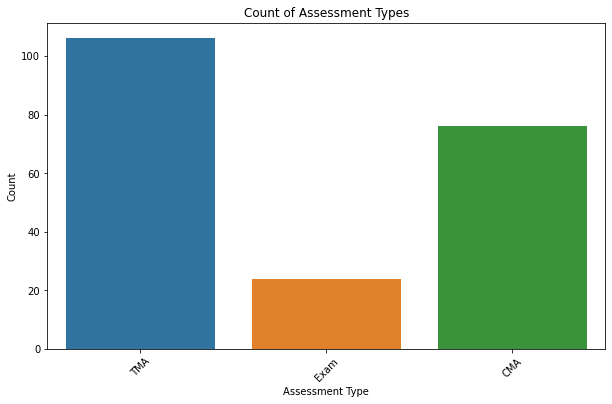

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='assessment_type')
plt.title('Count of Assessment Types')
plt.xlabel('Assessment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

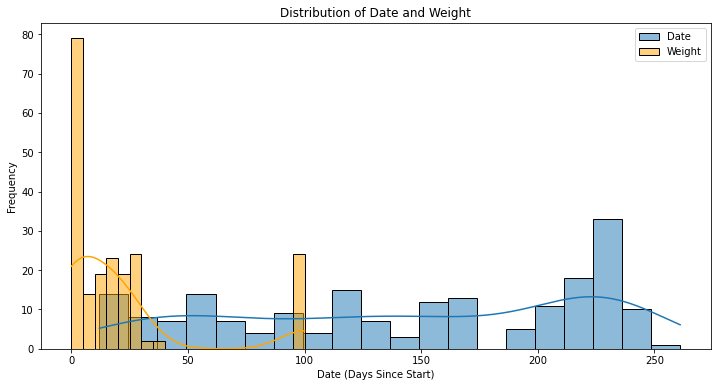

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='date', bins=20, kde=True, label='Date')
sns.histplot(data=data, x='weight', bins=20, kde=True, label='Weight', color='orange')
plt.title('Distribution of Date and Weight')
plt.xlabel('Date (Days Since Start)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

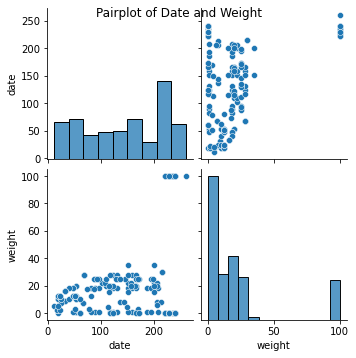

In [13]:
sns.pairplot(data[['date', 'weight']])
plt.suptitle('Pairplot of Date and Weight')
plt.show()